# Go/NoGo modeling results

### Sepehr Feb 2022

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
# import json
# from tqdm import tqdm_notebook 
import statsmodels.formula.api as smf

In [4]:
def annotate_regplot(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x=data[x], y=data[y])
    rmse = mean_squared_error(data[x], data[y], squared=False)
    ax.text(.02, .9, f'corrcoef={slope:.2f}, p={pvalue:.2g} ', transform=ax.transAxes)

In [5]:
first_model = pd.read_csv('result_of_modeling_matlab_first_session.csv')
second_model = pd.read_csv('result_of_modeling_matlab_second_session.csv')

# First Session Model Statistics

In [6]:
first_model.describe()

,alpha,beta_rew,beta_pun,noise,bias,pav
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.334432,9.712342,4.021571,0.926076,1.307784,1.248126
std,0.157908,8.184933,3.318423,0.085762,1.013521,1.241718
min,0.053498,0.386163,0.500089,0.464027,-1.922730,0.107839
25%,0.214941,3.925609,1.264539,0.929770,0.716472,0.451461
50%,0.321726,7.678014,3.129930,0.959141,1.299511,0.765731
75%,0.424549,13.669334,5.726250,0.975530,2.002116,1.536917
max,0.834755,55.978085,15.886796,0.983176,4.112235,5.968860


Text(0.5, 0.98, 'First Session Results')

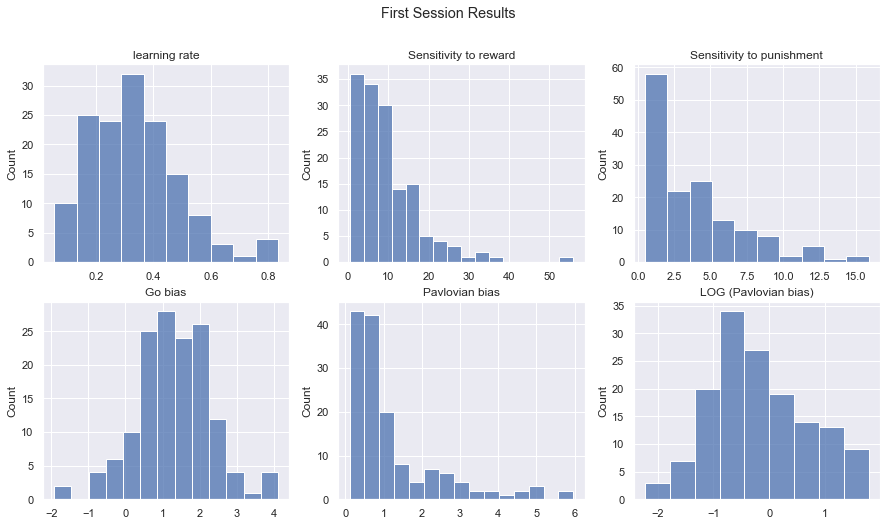

In [7]:
fig, axs = plt.subplots(2,3, figsize = (15,8))

ax1 = sns.histplot(first_model['alpha'], ax=axs[(0,0)])
ax1.set_title("learning rate")
ax1.set_xlabel("")
ax2 = sns.histplot(first_model['beta_rew'], ax=axs[(0,1)])
ax2.set_title("Sensitivity to reward")
ax2.set_xlabel("")

ax2 = sns.histplot(first_model['beta_pun'], ax=axs[(0,2)])
ax2.set_title("Sensitivity to punishment")
ax2.set_xlabel("")

ax3 = sns.histplot(first_model['bias'], ax=axs[(1,0)])
ax3.set_title("Go bias")
ax3.set_xlabel("")

ax4 = sns.histplot(first_model['pav'], ax=axs[(1,1)])
ax4.set_title("Pavlovian bias")
ax4.set_xlabel("");

ax4 = sns.histplot(np.log(first_model['pav']), ax=axs[(1,2)])
ax4.set_title("LOG (Pavlovian bias)")
ax4.set_xlabel("");
fig.suptitle('First Session Results')


# Second Session Model Statistics

In [8]:
second_model.describe()

,alpha,beta_rew,beta_pun,noise,bias,pav
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.315846,16.502569,5.645278,0.950049,1.005526,1.450398
std,0.166309,15.128591,4.272089,0.059671,0.851759,1.515357
min,0.024362,1.523166,0.707186,0.538273,-1.660483,0.171902
25%,0.207268,6.695287,2.450545,0.951625,0.569489,0.551425
50%,0.285072,12.855562,4.855835,0.967444,1.112859,0.992455
75%,0.403101,20.771726,7.676661,0.976920,1.567899,1.750374
max,0.833290,106.649624,25.143381,0.984965,2.845248,8.146552


Text(0.5, 0.98, 'Second Session Results')

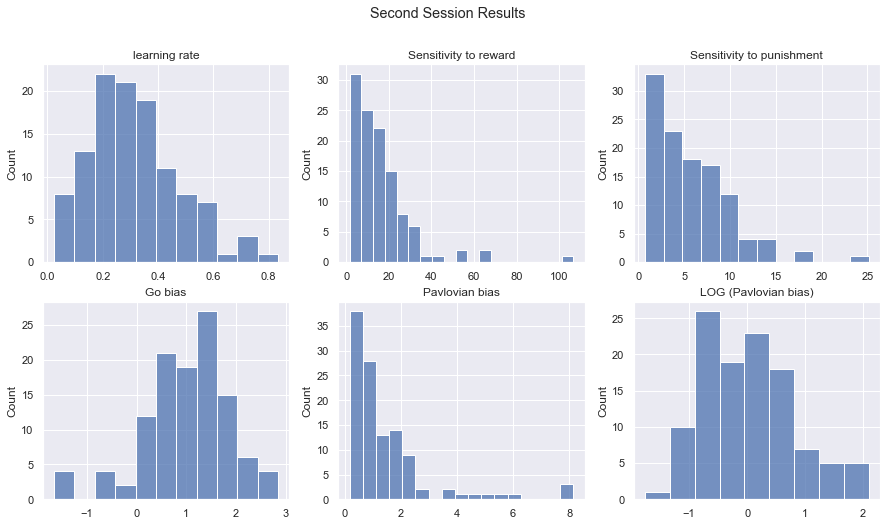

In [9]:
fig, axs = plt.subplots(2,3, figsize = (15,8))

ax1 = sns.histplot(second_model['alpha'], ax=axs[(0,0)])
ax1.set_title("learning rate")
ax1.set_xlabel("")
ax2 = sns.histplot(second_model['beta_rew'], ax=axs[(0,1)])
ax2.set_title("Sensitivity to reward")
ax2.set_xlabel("")

ax2 = sns.histplot(second_model['beta_pun'], ax=axs[(0,2)])
ax2.set_title("Sensitivity to punishment")
ax2.set_xlabel("")

ax3 = sns.histplot(second_model['bias'], ax=axs[(1,0)])
ax3.set_title("Go bias")
ax3.set_xlabel("")

ax4 = sns.histplot(second_model['pav'], ax=axs[(1,1)])
ax4.set_title("Pavlovian bias")
ax4.set_xlabel("");

ax4 = sns.histplot(np.log(second_model['pav']), ax=axs[(1,2)])
ax4.set_title("LOG (Pavlovian bias)")
ax4.set_xlabel("");

fig.suptitle('Second Session Results')


In [10]:
first_second_model = pd.merge(second_model.rename(columns = { 'alpha':'alpha_second','beta_rew':'beta_rew_second', 'beta_pun':'beta_pun_second','pav': 'pav_second', 'bias': 'bias_second'}),
                              first_model.rename(columns = {'alpha':'alpha_first', 'beta_rew':'beta_rew_first', 'beta_pun':'beta_pun_first', 'pav': 'pav_first', 'bias': 'bias_first'}), 
                              on = 'mturkID', how = 'left')
first_round_perfornance = pd.read_csv('Data/first_round_final_performance.csv',index_col= 0)
second_round_perfornance = pd.read_csv('Data/second_round_final_performance.csv',index_col= 0)

all_performance = pd.merge(second_round_perfornance, first_round_perfornance, on = 'mturkID', how = 'left')

model_perf = pd.merge(all_performance,first_second_model, on = 'mturkID')


In [11]:
model_perf['gw_g2ap_first'] = model_perf['go2win_first_session'] - model_perf['go2avoidPun_first_session']
model_perf['gw_g2ap_second'] = model_perf['go2win_second_session'] - model_perf['go2avoidPun_second_session']

# Sanity Check

# g2w + ng2ap - (ng2w + g2ap) vs. pavlovian 

In [12]:
first_pav_new_metric = (model_perf['go2win_first_session'] + model_perf['nogo2avoidPun_first_session']) - (model_perf['nogo2win_first_session'] + model_perf['go2avoidPun_first_session'])
second_pav_new_metric = (model_perf['go2win_second_session'] + model_perf['nogo2avoidPun_second_session']) - (model_perf['nogo2win_second_session'] + model_perf['go2avoidPun_second_session'])

first_bias_metric = (model_perf['go2win_first_session'] + model_perf['go2avoidPun_first_session']) - (model_perf['nogo2win_first_session'] + model_perf['nogo2avoidPun_first_session'])
second_bias_metric = (model_perf['go2win_second_session'] + model_perf['go2avoidPun_second_session']) - (model_perf['nogo2win_second_session'] + model_perf['nogo2avoidPun_second_session'])

model_perf['first_bias_non_parametric'] = first_bias_metric
model_perf['second_bias_non_parametric'] = second_bias_metric

model_perf['first_pav_non_parametric'] = first_pav_new_metric
model_perf['second_pav_non_parametric'] = second_pav_new_metric

model_perf['ln_pav_second'] = np.log(model_perf['pav_second'])
model_perf['ln_pav_first'] = np.log(model_perf['pav_first'])

In [44]:
axs[0]

<AxesSubplot:>

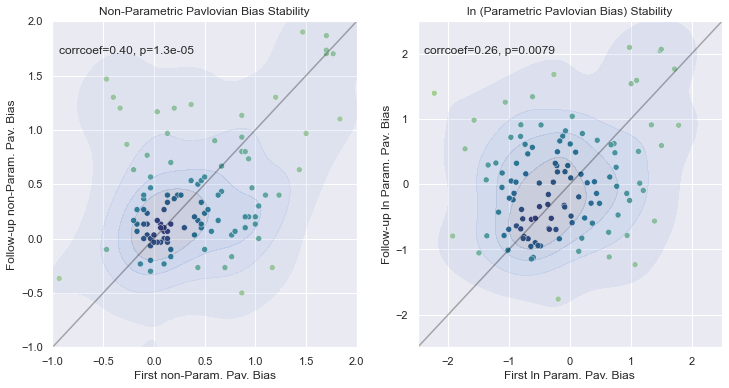

In [81]:
fig, axs = plt.subplots(1,2, figsize = (12,6))
xy = np.vstack([model_perf['first_pav_non_parametric'],model_perf['second_pav_non_parametric']])
z = stats.gaussian_kde(xy)(xy)
sns.scatterplot(x = 'first_pav_non_parametric', y = 'second_pav_non_parametric', data = model_perf, hue=z, palette= 'crest' , ax=axs[0])
annotate_regplot(axs[0], model_perf, 'first_pav_non_parametric', 'second_pav_non_parametric')
axs[0].set_title('Non-Parametric Pavlovian Bias Stability')
axs[0].set(ylim=(-1, 2), xlim=(-1, 2))
sns.lineplot(x=[-2.5, 2.5], y=[-2.5, 2.5], color = 'black', alpha = 0.3, ax= axs[0])
sns.kdeplot(
    data=model_perf,
    x="first_pav_non_parametric",
    y="second_pav_non_parametric",
    palette="crest",
    levels=5,
    fill=True,
    alpha=0.2,
    cut=2,
    ax=axs[0],
)

axs[0].set(xlabel='First non-Param. Pav. Bias', ylabel='Follow-up non-Param. Pav. Bias')



xy = np.vstack([model_perf['ln_pav_first'],model_perf['ln_pav_second']])
z = stats.gaussian_kde(xy)(xy)
ax_pav_log = sns.scatterplot(x = 'ln_pav_first', y = 'ln_pav_second', data = model_perf, 
                            hue=z,
                             palette= 'crest', ax=axs[1])

annotate_regplot(axs[1], model_perf, 'ln_pav_second', 'ln_pav_first')
axs[1].set_title('ln (Parametric Pavlovian Bias) Stability')
axs[1].set(ylim=(-2.5, 2.5), xlim=(-2.5, 2.5))
sns.lineplot(x=[-2.5, 2.5], y=[-2.5, 2.5], color = 'black', alpha = 0.3, ax= axs[1])
sns.kdeplot(
    data=model_perf,
    x="ln_pav_first",
    y="ln_pav_second",
    palette="crest",
    levels=5,
    fill=True,
    alpha=0.2,
    cut=2,
    ax=axs[1],
)

axs[1].set(xlabel='First ln Param. Pav. Bias', ylabel='Follow-up ln Param. Pav. Bias')

for ax in axs:
    ax.legend([],[], frameon=False)



<AxesSubplot:xlabel='nogo2win_first_session', ylabel='ln_pav_first'>

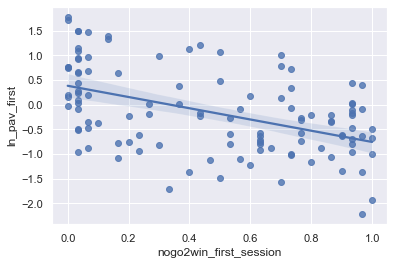

In [14]:
sns.regplot(x = 'nogo2win_first_session', y = 'ln_pav_first', data = model_perf)
# model_perf['nogo2win_first_session']

Text(0.5, 1.0, 'Second session Parametric vs. Non-parametric Go Bias')

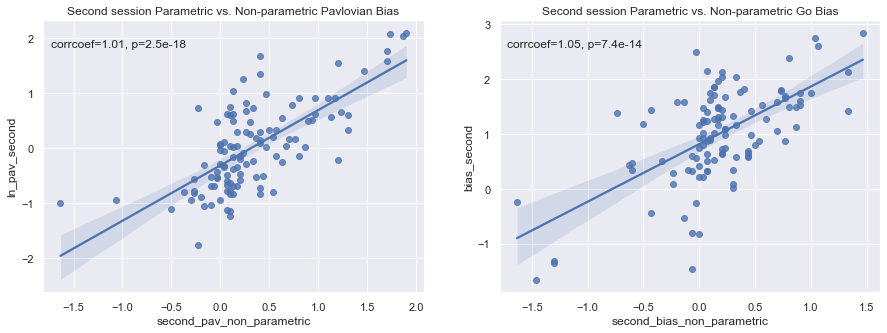

In [15]:
fig, axs = plt.subplots(1,2, figsize = (12,6))
xy = np.vstack([model_perf['first_pav_non_parametric'],model_perf['second_pav_non_parametric']])
z = stats.gaussian_kde(xy)(xy)
sns.scatterplot(x = 'first_pav_non_parametric', y = 'ln_pav_first', data = model_perf, hue=z, palette= 'crest' , ax=axs[0])
annotate_regplot(axs[0], model_perf, 'first_pav_non_parametric', 'second_pav_non_parametric')
axs[0].set_title('Non-Parametric Pavlovian Bias Stability')
axs[0].set(ylim=(-1, 2), xlim=(-1, 2))
sns.lineplot(x=[-2.5, 2.5], y=[-2.5, 2.5], color = 'black', alpha = 0.3, ax= axs[0])
sns.kdeplot(
    data=model_perf,
    x="first_pav_non_parametric",
    y="second_pav_non_parametric",
    palette="crest",
    levels=5,
    fill=True,
    alpha=0.2,
    cut=2,
    ax=axs[0],
)

axs[0].set(xlabel='First non-Param. Pav. Bias', ylabel='Follow-up non-Param. Pav. Bias')



xy = np.vstack([model_perf['second_pav_non_parametric'],model_perf['ln_pav_second']])
z = stats.gaussian_kde(xy)(xy)
ax_pav_log = sns.scatterplot(x = 'ln_pav_first', y = 'ln_pav_second', data = model_perf, 
                            hue=z,
                             palette= 'crest', ax=axs[1])

annotate_regplot(axs[1], model_perf, 'ln_pav_second', 'ln_pav_first')
axs[1].set_title('ln (Parametric Pavlovian Bias) Stability')
axs[1].set(ylim=(-2.5, 2.5), xlim=(-2.5, 2.5))
sns.lineplot(x=[-2.5, 2.5], y=[-2.5, 2.5], color = 'black', alpha = 0.3, ax= axs[1])
sns.kdeplot(
    data=model_perf,
    x="ln_pav_first",
    y="ln_pav_second",
    palette="crest",
    levels=5,
    fill=True,
    alpha=0.2,
    cut=2,
    ax=axs[1],
)

axs[1].set(xlabel='First ln Param. Pav. Bias', ylabel='Follow-up ln Param. Pav. Bias')

for ax in axs:
    ax.legend([],[], frameon=False)



Text(0.5, 1.0, 'first session Parametric vs. Non-parametric Go Bias')

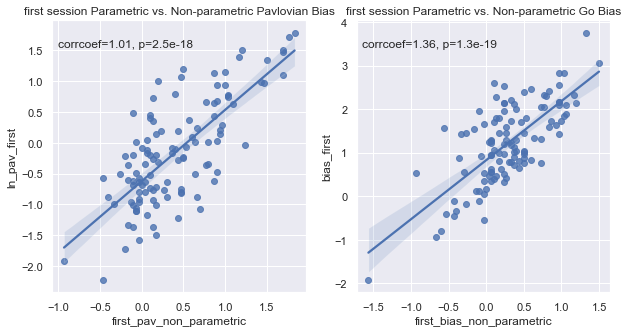

In [82]:
fig, axs = plt.subplots(1,2, figsize = (10,5))
ax_pav = sns.regplot(x = 'first_pav_non_parametric', y = 'ln_pav_first', data = model_perf, ax=axs[(0)])
annotate_regplot(ax_pav, model_perf, 'second_pav_non_parametric', 'ln_pav_second')
ax_pav.set_title('first session Parametric vs. Non-parametric Pavlovian Bias')

ax_bias = sns.regplot(x = 'first_bias_non_parametric', y = 'bias_first', data = model_perf, ax=axs[(1)])
annotate_regplot(ax_bias, model_perf, 'first_bias_non_parametric', 'bias_first')
ax_bias.set_title('first session Parametric vs. Non-parametric Go Bias')

# First and Second Parameters

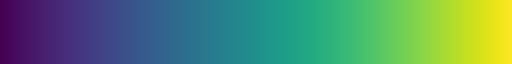

In [17]:
sns.color_palette("viridis", as_cmap=True)

Text(0.5, 0, '')

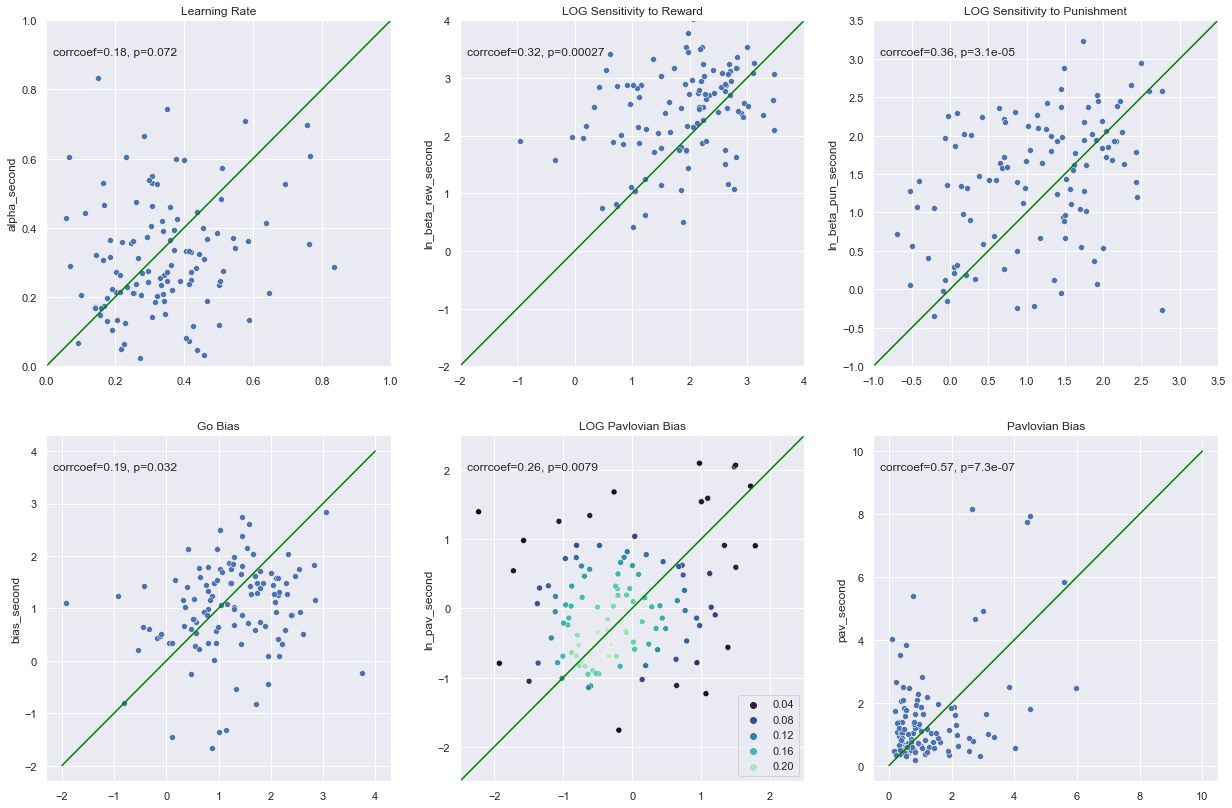

In [32]:
fig, axs = plt.subplots(2,3, figsize = (21,14))

ax_alpha = sns.scatterplot(x = 'alpha_first', y = 'alpha_second', data = model_perf, ax=axs[(0,0)])
annotate_regplot(ax_alpha, model_perf, 'alpha_first', 'alpha_second')
ax_alpha.set_title('Learning Rate')
ax_alpha.set(ylim=(0, 1), xlim=(0, 1))
sns.lineplot(x=[0, 1], y=[0, 1], color = 'green', ax= ax_alpha)
ax_alpha.set_xlabel("")

ax_beta_rew = sns.scatterplot(x = 'ln_beta_rew_first', y = 'ln_beta_rew_second', data = model_perf, ax=axs[(0,1)])
annotate_regplot(ax_beta_rew, model_perf, 'ln_beta_rew_first', 'ln_beta_rew_second')
ax_beta_rew.set_title('LOG Sensitivity to Reward')
ax_beta_rew.set(ylim=(-2, 4), xlim=(-2, 4))
sns.lineplot(x=[-2, 4], y=[-2, 4], color = 'green', ax= ax_beta_rew)
ax_beta_rew.set_xlabel("")

ax_beta_pun = sns.scatterplot(x = 'ln_beta_pun_first', y = 'ln_beta_pun_second', data = model_perf, ax=axs[(0,2)])
annotate_regplot(ax_beta_pun, model_perf, 'ln_beta_pun_first', 'ln_beta_pun_second')
ax_beta_pun.set_title('LOG Sensitivity to Punishment')
ax_beta_pun.set(ylim=(-1, 3.5), xlim=(-1, 3.5))
sns.lineplot(x=[-1, 3.5], y=[-1, 3.5], color = 'green', ax= ax_beta_pun)

ax_beta_pun.set_xlabel("")


ax_bias = sns.scatterplot(x = 'bias_first', y = 'bias_second', data = model_perf, ax=axs[(1,0)])
annotate_regplot(ax_bias, model_perf, 'bias_first', 'bias_second')
ax_bias.set_title('Go Bias')
ax_beta_rew.set(ylim=(-2, 4), xlim=(-2, 4))
sns.lineplot(x=[-2, 4], y=[-2, 4], color = 'green', ax= ax_bias)
ax_bias.set_xlabel("")


xy = np.vstack([model_perf['ln_pav_first'],model_perf['ln_pav_second']])
z = stats.gaussian_kde(xy)(xy)
ax_pav_log = sns.scatterplot(x = 'ln_pav_first', y = 'ln_pav_second', data = model_perf, hue=z, palette= 'mako', ax=axs[(1,1)])
annotate_regplot(ax_pav_log, model_perf, 'ln_pav_second', 'ln_pav_first')
ax_pav_log.set_title('LOG Pavlovian Bias')
ax_pav_log.set(ylim=(-2.5, 2.5), xlim=(-2.5, 2.5))
sns.lineplot(x=[-2.5, 2.5], y=[-2.5, 2.5], color = 'green', ax= ax_pav_log)



ax_pav_log.set_xlabel("")

ax_pav = sns.scatterplot(x = 'pav_first', y = 'pav_second', data = model_perf, ax=axs[(1,2)])
annotate_regplot(ax_pav, model_perf, 'pav_first', 'pav_second')
ax_pav.set_title('Pavlovian Bias')
sns.lineplot(x=[0,10], y=[0,10], color = 'green', ax= ax_pav)
ax_pav.set_xlabel("")



# Pavlovian first session vs. second session

## Pavlovian

<AxesSubplot:xlabel='ln_pav_second', ylabel='ln_pav_first'>

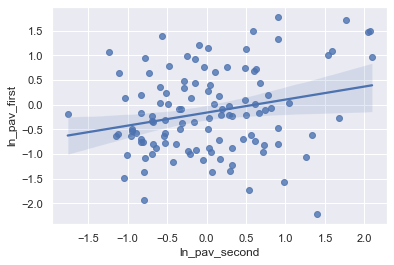

In [19]:



sns.regplot(x = 'ln_pav_second', y = 'ln_pav_first', 
#             data=model_perf
            data = model_perf[(model_perf.pav_second < 10) & (model_perf.pav_first < 10)]
                             
                             )

In [20]:

smf.ols(formula = 'ln_pav_first ~ ln_pav_second', 
        data =model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ln_pav_first   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     7.315
Date:                Tue, 17 May 2022   Prob (F-statistic):            0.00791
Time:                        19:39:57   Log-Likelihood:                -138.69
No. Observations:                 114   AIC:                             281.4
Df Residuals:                     112   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1597      0.077     -2.068      0.041      -0.313      -0.007
ln_pav_second     0.2644      0.098      2.705      0.008       0.071       0.458
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.371
Skew:                          -0.030   Prob(JB):                        0.831
Kurtosis:                       2.727   Cond. No.                         1.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
huber_t = sm.RLM(model_perf.ln_pav_first, sm.add_constant(model_perf.ln_pav_second), M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(
    hub_results.summary()
)


                    Robust linear Model Regression Results                    
Dep. Variable:           ln_pav_first   No. Observations:                  114
Model:                            RLM   Df Residuals:                      112
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 17 May 2022                                         
Time:                        19:39:57                                         
No. Iterations:                    14                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1547      0.081     -1.908

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## bias

In [22]:

sns.regplot(x = 'first_bias_metric', y = 'second_bias_metric', 
            data = model_perf)

KeyError: 'first_bias_metric'

<AxesSubplot:xlabel='bias_second', ylabel='bias_first'>

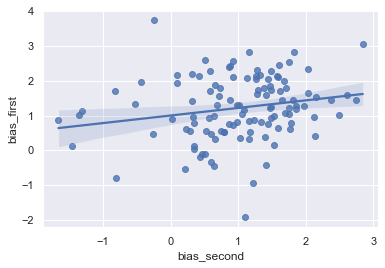

In [23]:
sns.regplot(x = 'bias_second', y = 'bias_first', 
            data = model_perf)

In [24]:

smf.ols(formula = 'bias_first ~ bias_second', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bias_first   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.738
Date:                Tue, 17 May 2022   Prob (F-statistic):             0.0316
Time:                        19:39:58   Log-Likelihood:                -149.25
No. Observations:                 114   AIC:                             302.5
Df Residuals:                     112   BIC:                             308.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0039      0.131      7.644      0.000       0.744       1.264
bias_second     0.2173      0.100      2.177      0.032       0.019       0.415
==============================================================================
Omnibus:                        4.347   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.484
Skew:                          -0.236   Prob(JB):                        0.106
Kurtosis:                       3.849   Cond. No.                         2.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Learning rate

<AxesSubplot:xlabel='alpha_second', ylabel='alpha_first'>

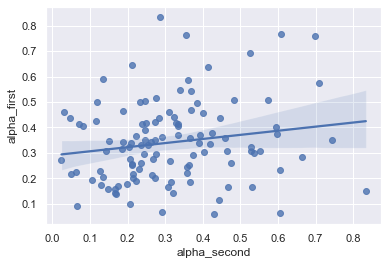

In [25]:
sns.regplot(x = 'alpha_second', y = 'alpha_first', 
            data = model_perf)

In [26]:

smf.ols(formula = 'alpha_first ~ alpha_second', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            alpha_first   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.297
Date:                Tue, 17 May 2022   Prob (F-statistic):             0.0721
Time:                        19:40:00   Log-Likelihood:                 50.239
No. Observations:                 114   AIC:                            -96.48
Df Residuals:                     112   BIC:                            -91.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2902      0.032      9.155      0.000       0.227       0.353
alpha_second     0.1614      0.089      1.816      0.072      -0.015       0.337
==============================================================================
Omnibus:                        8.143   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.816
Skew:                           0.606   Prob(JB):                       0.0201
Kurtosis:                       3.419   Cond. No.                         6.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Sesnsitivity to reward and punishment

In [27]:
model_perf['ln_beta_rew_second'] = np.log(model_perf['beta_rew_second'])
model_perf['ln_beta_rew_first'] = np.log(model_perf['beta_rew_first'])

model_perf['ln_beta_pun_second'] = np.log(model_perf['beta_pun_second'])
model_perf['ln_beta_pun_first'] = np.log(model_perf['beta_pun_first'])

<AxesSubplot:xlabel='ln_beta_rew_second', ylabel='ln_beta_rew_first'>

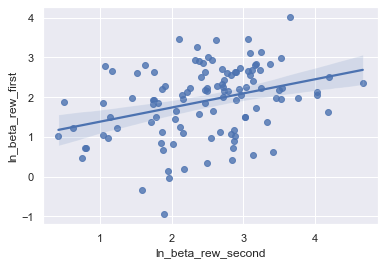

In [28]:
sns.regplot(x = 'ln_beta_rew_second', y = 'ln_beta_rew_first', 
            data = model_perf)

In [29]:

smf.ols(formula = 'ln_beta_rew_first ~ ln_beta_rew_second', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_beta_rew_first   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     14.18
Date:                Tue, 17 May 2022   Prob (F-statistic):           0.000267
Time:                        19:40:02   Log-Likelihood:                -141.92
No. Observations:                 114   AIC:                             287.8
Df Residuals:                     112   BIC:                             293.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0270      0.247      4.163      0.000       0.538       1.516
ln_beta_rew_second     0.3557      0.094      3.765      0.000       0.169       0.543
==============================================================================
Omnibus:                        4.505   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.167
Skew:                          -0.466   Prob(JB):                        0.124
Kurtosis:                       3.088   Cond. No.                         9.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='ln_beta_pun_second', ylabel='ln_beta_pun_first'>

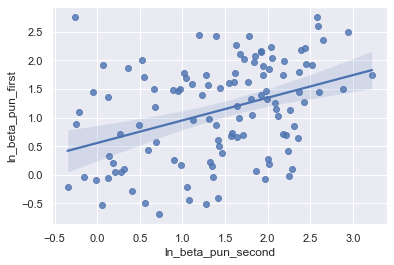

In [30]:
sns.regplot(x = 'ln_beta_pun_second', y = 'ln_beta_pun_first', 
            data = model_perf)

In [31]:

smf.ols(formula = 'ln_beta_pun_second ~ ln_beta_pun_first', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_beta_pun_second   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     18.87
Date:                Tue, 17 May 2022   Prob (F-statistic):           3.09e-05
Time:                        19:40:03   Log-Likelihood:                -131.47
No. Observations:                 114   AIC:                             266.9
Df Residuals:                     112   BIC:                             272.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0200      0.119      8.595      0.000       0.785       1.255
ln_beta_pun_first     0.3643      0.084      4.344      0.000       0.198       0.530
==============================================================================
Omnibus:                        4.608   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.675
Skew:                          -0.477   Prob(JB):                       0.0966
Kurtosis:                       2.727   Cond. No.                         3.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (G2W - NG2W) vs. model paramters

In [119]:
model_perf['g2w_ng2w_first'] = model_perf['go2win_first_session'] - model_perf['nogo2win_first_session'] 



## pavlovian

<AxesSubplot:xlabel='pav_first', ylabel='g2w_ng2w_first'>

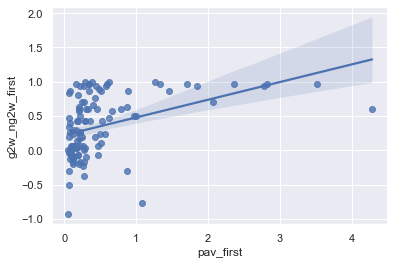

In [89]:
sns.regplot(y = "g2w_ng2w_first", x = 'pav_first', data=model_perf)

In [90]:

smf.ols(formula = 'pav_first ~ g2w_ng2w_first', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pav_first   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     22.91
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           5.23e-06
Time:                        14:42:01   Log-Likelihood:                -109.81
No. Observations:                 114   AIC:                             223.6
Df Residuals:                     112   BIC:                             229.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2578      0.077      3.363      0.001       0.106       0.410
g2w_ng2w_first     0.6582      0.138      4.786      0.000       0.386       0.931
==============================================================================
Omnibus:                       96.869   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.836
Skew:                           2.959   Prob(JB):                    3.05e-167
Kurtosis:                      14.243   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## bias

<AxesSubplot:xlabel='bias_first', ylabel='g2w_ng2w_first'>

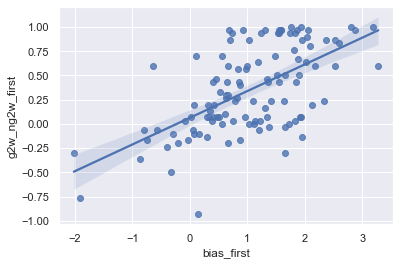

In [91]:
sns.regplot(y = "g2w_ng2w_first", x = 'bias_first', data=model_perf)

In [92]:

smf.ols(formula = 'bias_first ~ g2w_ng2w_first', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bias_first   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     64.98
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           9.14e-13
Time:                        14:43:15   Log-Likelihood:                -130.91
No. Observations:                 114   AIC:                             265.8
Df Residuals:                     112   BIC:                             271.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5691      0.092      6.170      0.000       0.386       0.752
g2w_ng2w_first     1.3339      0.165      8.061      0.000       1.006       1.662
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.001
Skew:                          -0.005   Prob(JB):                         1.00
Kurtosis:                       3.008   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## learning rate

<AxesSubplot:xlabel='alpha_first', ylabel='g2w_ng2w_first'>

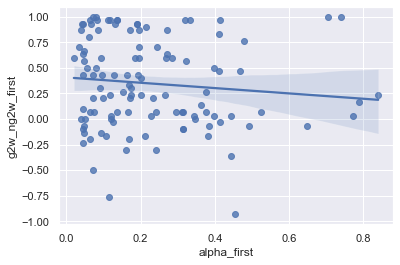

In [93]:
sns.regplot(y = "g2w_ng2w_first", x = 'alpha_first', data=model_perf)

In [94]:

smf.ols(formula = 'alpha_first ~ g2w_ng2w_first', 
        data = model_perf).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            alpha_first   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.310
Date:                Mon, 28 Feb 2022   Prob (F-statistic):              0.255
Time:                        14:43:48   Log-Likelihood:                 34.661
No. Observations:                 114   AIC:                            -65.32
Df Residuals:                     112   BIC:                            -59.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2397      0.022     11.104      0.000       0.197       0.282
g2w_ng2w_first    -0.0443      0.039     -1.145      0.255      -0.121       0.032
==============================================================================
Omnibus:                       33.364   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.782
Skew:                           1.380   Prob(JB):                     3.46e-12
Kurtosis:                       4.868   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## sensitivity to reward

<AxesSubplot:xlabel='beta_first', ylabel='g2w_ng2w_first'>

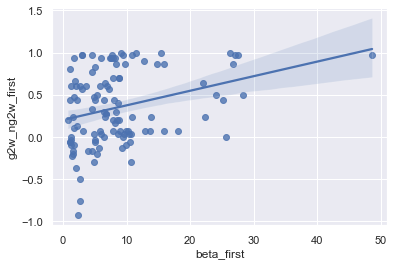

In [120]:
sns.regplot(y = "g2w_ng2w_first", x = 'beta_first', data=model_perf)